
启动数据库服务器
```bash
bash /mnt/petrelfs/songmingyang/code/mm/robustLMM/robustlmm/analysis/longTail/language_level/db/start_neo4j.sh
```

shell启动 odbc
```bash
cypher-shell  -a neo4j://10.140.54.16:7687  -u neo4j -p 12345678
```
数据库操作
```sql
CREATE DATABASE XXX;
:use XXX;
CREATE DATABASE lcs558kPos;
CREATE DATABASE instructmix665kPos;
```

数据操作
```sql
CREATE CONSTRAINT FOR (n:WORD) REQUIRE n.lemma IS UNIQUE;

MERGE (n:WORD { lemma: 'test' })
ON CREATE SET n.count = 1
ON MATCH SET n.count = n.count + 1;


MERGE (a:WORD { lemma:'test' })
ON CREATE SET a.count = 1
MERGE (b:WORD { lemma:'test1' })
ON CREATE SET b.count = 1
MERGE (a)-[r:CO_OCCURRENCE]->(b)
ON CREATE SET r.count = 0
WITH a,b,r
SET r.count = r.count + 1;


```
常用查询

```sql

MATCH (n) DETACH DELETE n;
MATCH (n) RETURN n;
MATCH (n) RETURN COUNT(n);
MATCH (a)-[r:CO_OCCURRENCE]->(b) RETURN r;
```

In [2]:
from py2neo import *
from neo4j import GraphDatabase
uri = "neo4j://10.140.54.12:7687"
driver = GraphDatabase.driver(uri, auth=("neo4j", "12345678"))
gds_version_query = "call dbms.components() yield name, versions, edition unwind versions as version return name, version, edition;"
# gds_version_query = "match (n) return count(n)"
# Create a driver session
with driver.session() as session:
    results = session.run(gds_version_query).data()
    print ("Neo4j Kernel version :" + str(results[0]['version']))


Neo4j Kernel version :5.19.0


In [3]:
query = "match (n) return n;"
query = "match (a)-[r:CO_OCCURRENCE]->(b) return a.lemma, r.count, b.lemma;"
with driver.session(database="instructmix665kllama") as session:
    results = session.run(query).data()


In [4]:
# results.sort(key=lambda x: x['n']['count'], reverse=True)
results.sort(key=lambda x: x['r.count'], reverse=True)
results[:20]


[{'a.lemma': 'man', 'r.count': 10412, 'b.lemma': 'woman'},
 {'a.lemma': 'man', 'r.count': 9487, 'b.lemma': 'shirt'},
 {'a.lemma': '', 'r.count': 7188, 'b.lemma': 'man'},
 {'a.lemma': '', 'r.count': 3756, 'b.lemma': 'woman'},
 {'a.lemma': 'hat', 'r.count': 3739, 'b.lemma': 'man'},
 {'a.lemma': 'shirt', 'r.count': 3694, 'b.lemma': 'woman'},
 {'a.lemma': 'jacket', 'r.count': 3490, 'b.lemma': 'man'},
 {'a.lemma': 'glasses', 'r.count': 3289, 'b.lemma': 'man'},
 {'a.lemma': 'field', 'r.count': 3209, 'b.lemma': 'grass'},
 {'a.lemma': 'couch', 'r.count': 3078, 'b.lemma': 'pillow'},
 {'a.lemma': 'man', 'r.count': 2836, 'b.lemma': 'surfboard'},
 {'a.lemma': 'man', 'r.count': 2746, 'b.lemma': 'skateboard'},
 {'a.lemma': 'clouds', 'r.count': 2578, 'b.lemma': 'sky'},
 {'a.lemma': '', 'r.count': 2531, 'b.lemma': 'table'},
 {'a.lemma': 'man', 'r.count': 2521, 'b.lemma': 'tie'},
 {'a.lemma': 'man', 'r.count': 2520, 'b.lemma': 'table'},
 {'a.lemma': 'girl', 'r.count': 2514, 'b.lemma': 'man'},
 {'a.lemm

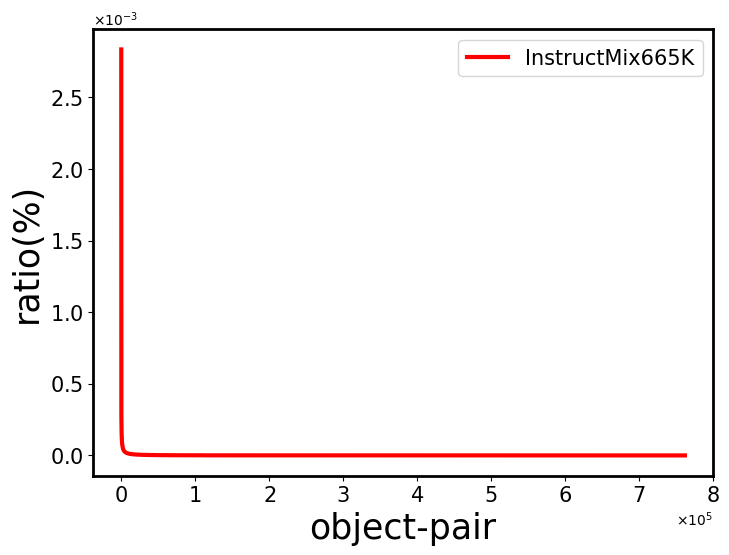

In [7]:
from matplotlib import pyplot as plt
from matplotlib import font_manager
import matplotlib.ticker as ticker
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1)) 


data = [a['r.count'] for a in results]
total = sum(data)
ratio = [a/total for a in data]
plt.figure(figsize=(8,5.8))
# plt.grid(True,axis='y',zorder=1)
# plt.plot(lcs_ratio, zorder=2
colors = [ '#ffe598', '#87edff', '#ff968d', '#b2ff89','#bc9eff','#bdbca5', 'grey', 'yellow','k','brown','grey','cyan',"pink"]
plt.plot(ratio, zorder=2, label="InstructMix665K",linewidth=3,color='red')

# plt.ylim(0,0.0001)
plt.legend()
# plt.xticks([0,50,100,150,200,250,300,2500,2550],mme_title[3:10]+mme_title[-2:],rotation=90)
plt.ylabel('ratio(%)',fontsize=25)
plt.xlabel('object-pair',fontsize=25)
plt.legend(frameon=True,fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax = plt.gca()

ax.yaxis.set_major_formatter(formatter)
ax.xaxis.set_major_formatter(formatter)
ax.spines['bottom'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
plt.savefig("./res/instructmix_llama_co_occurrence.pdf", format='pdf')
plt.show()